In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
mnist=keras.datasets.mnist

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])


In [6]:
print(X_train[0])
X_train.shape

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

(60000, 28, 28)

In [7]:
#normalising data for better accuracy
X_train=keras.utils.normalize(X_train)
X_test=keras.utils.normalize(X_test)

In [8]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Convolution2D,MaxPooling2D
from keras.models import Sequential

# reshap x_train and x_test for inputting to the convolution layer. The new dimention can be gray or RGB

In [10]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

# CNN Model

In [11]:
#building model
model= Sequential()
model.add(Convolution2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(128,activation='relu'))
model.add(Activation('relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


W0705 16:03:22.692012 4588033472 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 16:03:22.720853 4588033472 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 16:03:22.725831 4588033472 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 16:03:22.763597 4588033472 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
activation_2 (Activation)    (None, 6, 6, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
__________

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

W0705 16:03:22.868571 4588033472 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0705 16:03:22.903428 4588033472 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0705 16:03:23.004804 4588033472 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0705 16:03:23.058343 4588033472 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.comp

Epoch 1/5
60000/60000 [==============================] - 24s 402us/step - loss: 0.2336 - acc: 0.9292
Epoch 2/5
60000/60000 [==============================] - 24s 395us/step - loss: 0.0775 - acc: 0.9750
Epoch 3/5
60000/60000 [==============================] - 24s 399us/step - loss: 0.0545 - acc: 0.9827
Epoch 4/5
60000/60000 [==============================] - 25s 411us/step - loss: 0.0433 - acc: 0.9865
Epoch 5/5
60000/60000 [==============================] - 24s 405us/step - loss: 0.0347 - acc: 0.9887


In [13]:
val_loss,val_acc=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 124us/step


In [18]:
val_loss

0.03552783978948137

In [19]:
val_acc

0.9882

In [20]:
prediction=model.predict([X_test])

In [21]:
import numpy as np
np.argmax(prediction[1])

2

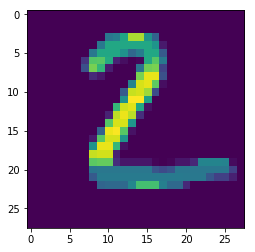

In [23]:
plt.imshow(X_test[1].reshape(28,28))